In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
twit=pd.read_csv('Twitter_Data.csv')
twit.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [92]:
twit.info

<bound method DataFrame.info of                                                clean_text  category
0       when modi promised “minimum government maximum...      -1.0
1       talk all the nonsense and continue all the dra...       0.0
2       what did just say vote for modi  welcome bjp t...       1.0
3       asking his supporters prefix chowkidar their n...       1.0
4       answer who among these the most powerful world...       1.0
...                                                   ...       ...
162975  why these 456 crores paid neerav modi not reco...      -1.0
162976  dear rss terrorist payal gawar what about modi...      -1.0
162977  did you cover her interaction forum where she ...       0.0
162978  there big project came into india modi dream p...       0.0
162979  have you ever listen about like gurukul where ...       1.0

[162980 rows x 2 columns]>

In [93]:
twit.describe()

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [94]:
twit.duplicated().sum()

np.int64(1)

In [95]:
twit.drop_duplicates(inplace=True)

In [96]:
twit.duplicated().sum()

np.int64(0)

In [97]:
twit.dropna(inplace=True)

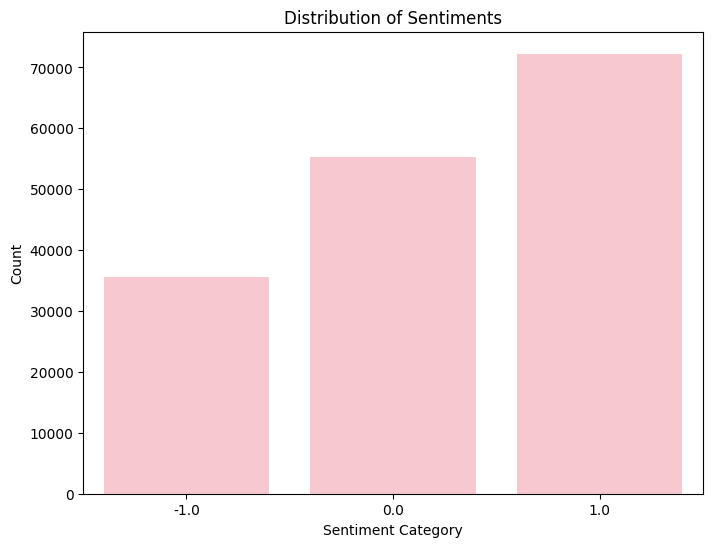

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x='category', data=twit, color='pink')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

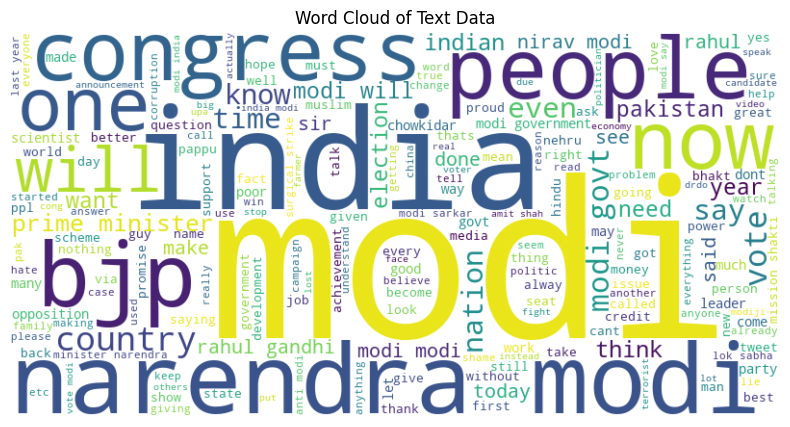

In [99]:
from wordcloud import WordCloud

text = ' '.join(twit['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [101]:
X = twit['clean_text']
y = twit['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
pipeline = Pipeline([
    ('vect', TfidfVectorizer()), 
    ('clf', MultinomialNB())      
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', TfidfVectorizer()), ('clf', MultinomialNB())])

In [103]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [104]:
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.56
              precision    recall  f1-score   support

        -1.0       0.96      0.10      0.17     10691
         0.0       0.92      0.31      0.46     16644
         1.0       0.51      0.99      0.67     21556

    accuracy                           0.56     48891
   macro avg       0.80      0.47      0.44     48891
weighted avg       0.75      0.56      0.49     48891



In [105]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1.0, 0.0, -1.0])

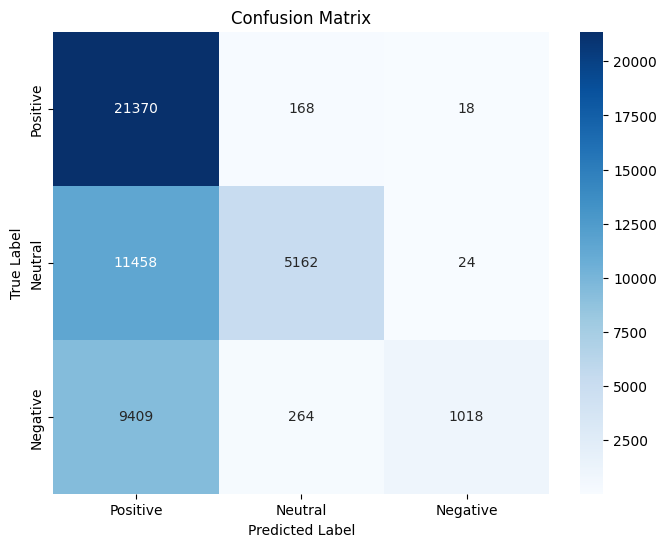

In [106]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positive', 'Neutral', 'Negative'], 
            yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [107]:
new_texts = [
    "I love the new features in the product!",
    "I hate waiting in long lines at the store.",
    "The service was okay, but could be better."
]

predictions = pipeline.predict(new_texts)
print(predictions)

[1. 1. 1.]
